# Workflow & Hyperparameter Optimization

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np

🏠 Import the house price data set. We will keep only numerical features for the sake of simplicity

🎯 Your goal will be to fit the best KNN Regressor. In particular, how many "neighbors" (<font color=blue>K</font> in <font color=blue>K</font>NN) should you consider to get the best predictions for your house prices ?

In [5]:
# Load raw data
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv', index_col="Id")

# Only keep numerical columns and raws without NaN
data = data.select_dtypes(include=np.number).dropna()

data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [6]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

## 1. Train/Test split

❓ **Question (Holdout)**❓

👇 Split the dataset to create your `X_train` `X_test` and `y_train` `y_test`. Use:
- `test_size=0.3`
- `random_state=0` to compare your results with your buddy

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

## 2. Scaling

⚖️ Scaling is always crucially important for the KNN algorithm..

❓ **Question (Scaling)** ❓ 

* Scale your train set and test set.
* Here, let's simply apply the `StandardScaler` and not waste time choosing one scaler per feature. Indeed, the goals of this exercise are to:
    * review KNN
    * understand GridSearchCV
    * understand RandomizedSearchCV

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),
                              columns = X_train.columns)

In [9]:
X_train_scaled

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.878719,0.186885,-0.066635,-0.159838,1.357895,-0.445886,-1.314462,0.108204,0.326950,-0.278554,...,-1.151130,-0.738939,-0.749484,-0.372566,-0.109954,2.195993,-0.061673,-0.146085,-0.110711,0.168285
1,-0.878719,2.108009,0.117185,-0.871846,0.415780,0.093483,-0.507574,-0.584157,0.659783,-0.278554,...,-0.352925,-0.738939,-0.749484,-0.372566,-0.109954,-0.277928,-0.061673,-0.146085,-1.965356,-0.577113
2,-0.878719,-0.453490,-0.533191,-0.871846,2.300009,-0.699707,0.773954,-0.584157,-0.065154,0.776043,...,1.117452,0.830288,-0.749484,-0.372566,-0.109954,-0.277928,-0.061673,-0.146085,0.260218,-0.577113
3,-0.144006,-0.965790,0.625369,0.552169,-0.526334,0.981856,0.821418,-0.584157,2.107377,-0.278554,...,0.854884,0.619980,-0.085080,-0.372566,-0.109954,3.490043,-0.061673,-0.146085,0.631147,0.913683
4,2.549942,-1.990389,-1.497216,0.552169,-0.526334,1.013584,0.868882,-0.327727,-0.972465,-0.278554,...,-0.668006,-0.738939,-0.131434,-0.372566,-0.109954,-0.277928,-0.061673,-0.146085,-0.481640,-1.322512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,-0.633815,-0.880406,-0.780483,-1.583853,-1.468449,-1.651535,-1.694174,-0.584157,-0.402546,-0.278554,...,-1.046103,-0.738939,-0.749484,2.246670,-0.109954,-0.277928,-0.061673,-0.146085,0.260218,-0.577113
780,0.100898,0.485726,-0.069108,1.264176,-0.526334,0.791490,0.584098,1.585241,1.475907,-0.278554,...,1.905154,-0.738939,0.332103,-0.372566,-0.109954,-0.277928,-0.061673,-0.146085,-0.110711,-1.322512
781,-0.878719,0.400343,-0.203469,-0.159838,0.415780,-0.255521,-1.029678,1.595498,0.288196,-0.278554,...,-0.242647,-0.738939,1.042860,-0.372566,-0.109954,-0.277928,-0.061673,3.974984,-1.223498,-1.322512
782,-0.144006,-0.453490,-0.332885,-1.583853,0.415780,-0.572797,-0.649966,-0.584157,-0.972465,-0.278554,...,0.214220,-0.738939,-0.749484,-0.372566,-0.109954,2.690777,-0.061673,-0.146085,-0.481640,0.168285


## 3. Baseline KNN model

❓ **Question (A baseline for our KNN)** ❓

Cross-validate (*cv = 5*) a simple KNN regressor taking into account only _the closest neighbor_, and compute the average score over the 5 folds.

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate

knn = KNeighborsRegressor(n_neighbors=1)
cross_validate(knn, X_train_scaled, y_train, cv=5)["test_score"].mean()

0.5601542887874071

## 4. GridSearch

### 4.1. A first GridSearch

❓ **Question (GridSearch v1)**❓

Let's use SKLearn `GridSearchCV` to find the best KNN hyperparameter `n_neighbors`.
- Start a coarse-grain approach, with `n_neighbors` = [1,5,10,20,50]
- 5-fold cross-validate each parameter
- Make sure to maximize your performance time using `n_jobs`

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Instantiate model
model = KNeighborsRegressor()

# Hyperparameter Grid
k_grid = {'n_neighbors' : [1,5,10,20,50]}

# Instantiate Grid Search
grid = GridSearchCV(model, k_grid, n_jobs=-1,  cv = 5)

# Fit data to Grid Search
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50]})

❓ **Question (best parameters)** ❓

According to the GridSearch, what is the optimal K value?

In [14]:
grid.best_params_

{'n_neighbors': 10}

❓ **Question (scoring)** ❓ What is the best score the optimal K value produced?

In [15]:
grid.best_score_

0.7596697382171873

### 4.2. A second GridSearch

❓ **Question (GridSearch V2)** ❓


Now, we have an idea about where the best $K$ lies, but some of the values we didn't try could result in a  better performance.

* Re-run a GridSearch trying some values for $K$ around to your previous best value
* What are the `best_score` and `best_k` for this refined GridSearch?

In [17]:
# Instantiate model
model = KNeighborsRegressor()


# Hyperparameter Grid
k_grid = {'n_neighbors' : np.arange(11,30,1)}


# Instantiate Grid Search
grid = GridSearchCV(model, k_grid, n_jobs=-1,  cv = 5)


# Fit data to Grid Search
grid.fit(X_train_scaled, y_train)

print(grid.best_params_["n_neighbors"])
print(grid.best_score_)


16
0.7666311417513013


In [18]:
best_k = grid.best_params_["n_neighbors"]
best_score = grid.best_score_

***🧪 Test your code***

In [19]:
from nbresult import ChallengeResult
result = ChallengeResult('knn',
                         best_k=best_k,
                         best_score=best_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-workflow/tests
plugins: anyio-3.6.1, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 2 items

test_knn.py::TestKnn::test_best_k PASSED                                 [ 50%]
test_knn.py::TestKnn::test_best_score PASSED                             [100%]

============================== 2 passed in 0.11s ===============================


💯 You can commit your code:

git add tests/knn.pickle

git commit -m 'Completed knn step'

git push origin master



### 4.3. Visual check (manual GridSearch)

☝️ This problem is actually simple enough to perform a GridSearch manually.

❓ **Question(Manual GridSearch)** ❓

- Loop manually over all values of $K$ from $1$ to $50$ and store the average of the cross-validated scores of each model in a list.
- Plot the scores as a function of $K$ to visually find the best $K$ using the `Elbow Method`

In [26]:
import matplotlib.pyplot as plt

In [23]:
scores=[]
for k in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores.append(cross_validate(knn, X_train_scaled, y_train, cv=5)["test_score"].mean())

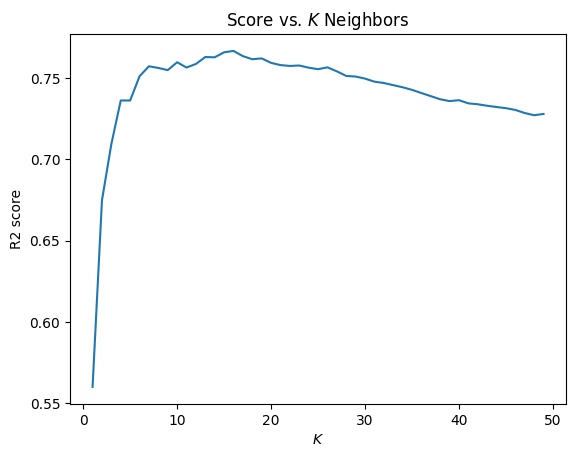

In [31]:
plt.plot(range(1,50), scores)
plt.title("Score vs. $K$ Neighbors")
plt.xlabel("$K$")
plt.ylabel("R2 score")
plt.show()

❓Can you guess what makes GridSearchCV a better option than such manual loop ?


<details>
    <summary>Answer</summary>

- Sklearn's `n_jobs=-1` allows you to parallelize the search, utilizing all of your CPU cores
- What if you had multiple hyper-parameters to co-optimize?
</details>

## 5. GridSearch with multiple parameters

👩🏻‍🏫 KNNRegressor suppports various _distance metrics_ via the hyper-parameter `p` 

📚 [sklearn.neighbors.KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

❓ **Question (tuning multiple parameters)** ❓


* Use GridSearchCV to search for the best $K$ and $p$ simultaneously.
    * Try all combinations for $K = [1, 5, 10, 20, 50]$ and $p = [1, 2, 3]$. 

In [32]:
model = KNeighborsRegressor()
k_grid = {'n_neighbors' : [1, 5, 10, 20, 50],
          'p': [1,2,3]}
grid = GridSearchCV(model, k_grid,
                     cv = 5, n_jobs=-1)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50], 'p': [1, 2, 3]})

❓ **Question (number of submodels)**❓

How many submodels did you train overall?

<details>
    <summary>Hint</summary>

Much more than 15. Think twice :)
    <details>
    <summary>Answer</summary>

75 models due to CV=5
</details>

In [ ]:
# YOUR CODE HERE

❓ **Question (best parameters and best score after tuning the model with multiple parameters)**❓

What are the *best parameters* and the *best score*?

In [33]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 10, 'p': 1}
0.7969255879201194


## 6. Random Search

Now let's see whether a RandomizedSearch can find a better combination with the same number of models being fitted.

❓ **Question (RandomizedSearchCV)** ❓

Use `RandomizedSearchCV` to
- Randomly sample $K$ from a uniform `scipy.stats.randint(1,50)` ([doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html)) distribution
- Sample $p$ from a list $[1,2,3]$
- Use the correct numbers of `n_iter` and `cv` to fit the exact same numbers of models as in your previous GridSearchCV.

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

model = KNeighborsRegressor()

search_space = {'n_neighbors': randint(1, 50), 'p': [1, 2, 3]}

search = RandomizedSearchCV(model, param_distributions=search_space,
                            n_jobs=-1,  cv=5, n_iter=15)

search.fit(X_train_scaled, y_train)

print(search.best_score_)
print(search.best_params_)

0.7949980062278728
{'n_neighbors': 7, 'p': 1}


## 7. Generalization

❓ **Question (finetuning your model one more time)**❓

- Refine your RandomsearchCV if you want
- Choose your best model

In [36]:
best_model = search.best_estimator_
best_model

KNeighborsRegressor(n_neighbors=7, p=1)

Now try to display your `cv_results` as a `DataFrame`, this will help you visualize what's going on inside the CV! 😉

In [38]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005049,0.000112,0.156426,0.001295,44,3,"{'n_neighbors': 44, 'p': 3}",0.701537,0.766204,0.646848,0.737823,0.657637,0.702010,0.045641,15
1,0.004953,0.000023,0.060285,0.001685,7,1,"{'n_neighbors': 7, 'p': 1}",0.736660,0.817465,0.757978,0.867009,0.795878,0.794998,0.045749,1
2,0.003847,0.000919,0.026256,0.024975,31,2,"{'n_neighbors': 31, 'p': 2}",0.736305,0.798639,0.695717,0.784442,0.723642,0.747749,0.038355,8
3,0.003091,0.000146,0.011446,0.000666,33,1,"{'n_neighbors': 33, 'p': 1}",0.762959,0.802696,0.718433,0.804131,0.735004,0.764644,0.034710,3
4,0.002985,0.000100,0.005188,0.000238,26,2,"{'n_neighbors': 26, 'p': 2}",0.738524,0.811411,0.699374,0.800078,0.733302,0.756538,0.042518,4
5,0.002769,0.000145,0.097591,0.002357,6,3,"{'n_neighbors': 6, 'p': 3}",0.675765,0.754340,0.667509,0.844996,0.669192,0.722360,0.069382,13
6,0.002902,0.000336,0.005033,0.000199,29,2,"{'n_neighbors': 29, 'p': 2}",0.738281,0.802296,0.696320,0.789035,0.728506,0.750888,0.039334,7
7,0.003146,0.000105,0.010630,0.001003,41,1,"{'n_neighbors': 41, 'p': 1}",0.753112,0.797950,0.715240,0.789323,0.722191,0.755564,0.033711,6
8,0.002528,0.000310,0.091727,0.003611,17,3,"{'n_neighbors': 17, 'p': 3}",0.725889,0.788035,0.705242,0.776904,0.695673,0.738348,0.037491,10
9,0.002340,0.000142,0.004554,0.000233,37,2,"{'n_neighbors': 37, 'p': 2}",0.731045,0.789914,0.688473,0.776315,0.708478,0.738845,0.038813,9


❓ **Question (Evaluation of the "best" model)** ❓

* Time has come to discover our model's performance with "best params" on the **unseen** test set `X_test`.
    * Compute the r2 score for the test set and save it as `r2_test`.

In [40]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, best_model.predict(scaler.transform(X_test)))
r2_test

/Users/bingobango/.pyenv/versions/3.10.6/envs/tom/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


0.7690584913149612

❓ **Question (Taking a step back)** ❓

Would you consider the optimized model to generalize well?

<details><summary>Answer</summary>

Test score may decrease a bit with train set. Probably not more than 5%. This can be due to
- A non-representative train/test split
- A cross-val number too small leading to overfitting the model-tuning phase. The more you cross-validated, the more robust your findings will generalize - but you can't increase cv too much if your dataset is too small as you won't keep enough observations in each fold to be representative.
- Our dataset is very small and our hyperparameter optimization is thus extremely dependent (and overfitting) on our train/test split. Always make sure your dataset is much bigger than the total number of hyperparameter combinations you are trying out!
    
</details>

***🧪 Test your code***

In [42]:
from nbresult import ChallengeResult
result = ChallengeResult('r2', 
                         r2_test=r2_test)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-workflow/tests
plugins: anyio-3.6.1, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_r2.py::TestR2::test_r2 PASSED                                       [100%]

============================== 1 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/r2.pickle

git commit -m 'Completed r2 step'

git push origin master



🏁 Congratulations! Now, you know how to finetune a model using either a GridSearchCV or a RandomizedSearchCV 

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!